In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [2]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/975/975ss1_1000cregcdFF20spsfkf93Smith0_4_60TS.mat


In [3]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(10476, 93)

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/test7/975/975ss1_1000cregcdFF20spsfkf93Smith0_4_60IC.nii


In [5]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(72, 41, 9, 93)

In [6]:
S=data.shape
S

(72, 41, 9, 93)

Z-score

In [7]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [8]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [9]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [11]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/975/975Behavior.mat


In [12]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [15]:
Time_fluoICA=np.array(range(10476))*0.005

In [16]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/975/combo_2015-07-01-155610-0000TimeOnVid.mat


In [19]:
Ua=sio.loadmat(filename)

In [20]:
TimeVid=Ua['TimeFluoOnVid']

In [23]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape


In [25]:
import pylab

In [30]:
Xk.shape

(7607, 3)

In [31]:
TimeVid.shape

(6154, 1)

In [36]:
Xk2=Xk[986:7140,:]

In [37]:
Xk2.shape

(6154, 3)

In [38]:
Xk=Xk2

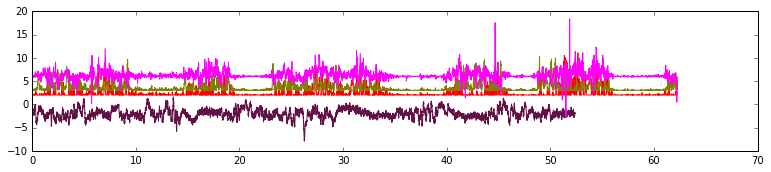

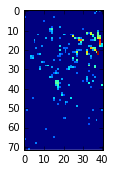

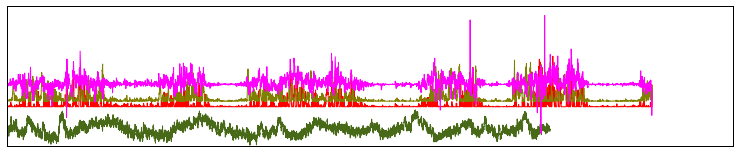

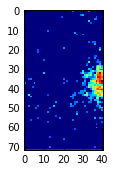

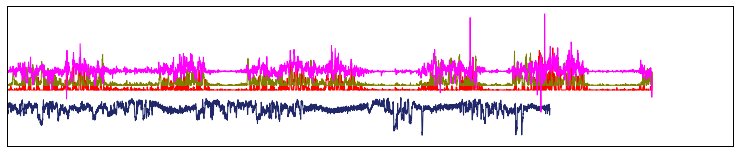

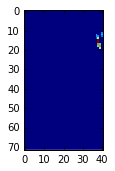

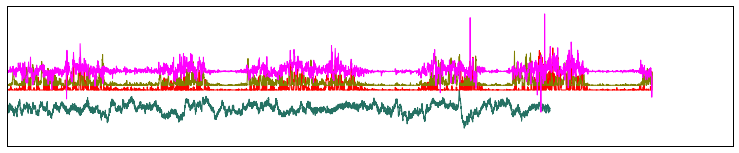

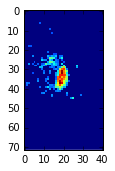

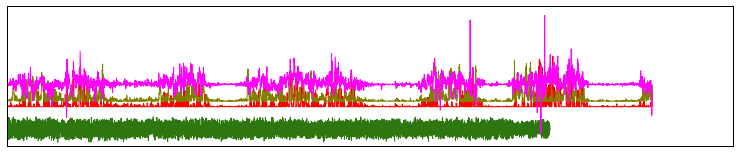

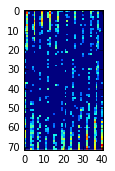

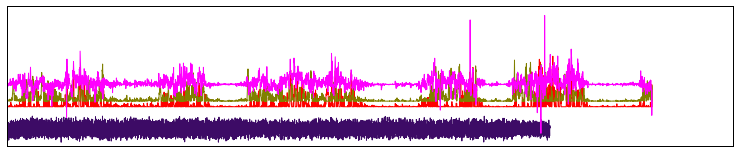

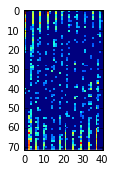

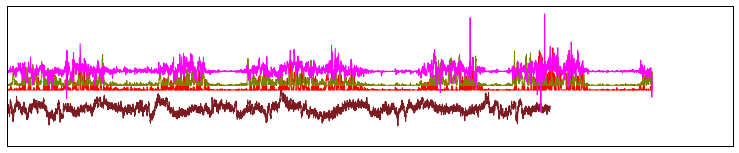

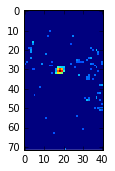

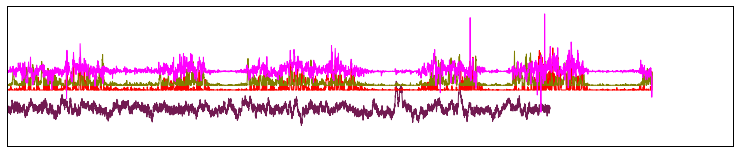

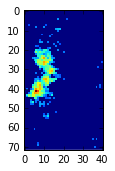

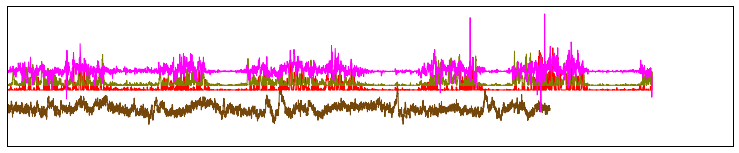

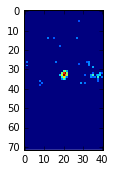

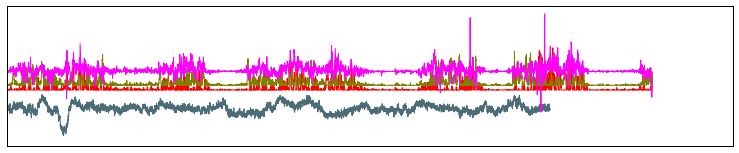

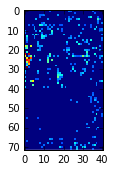

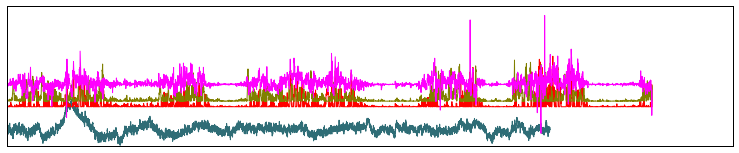

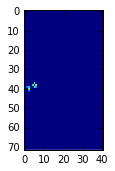

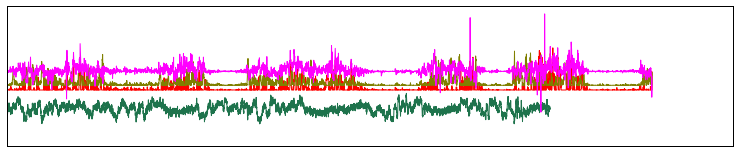

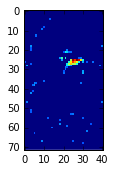

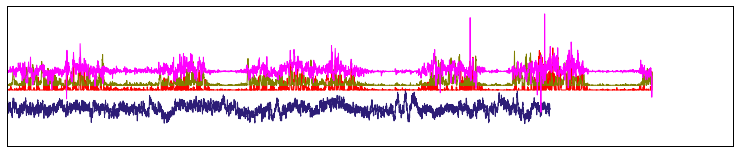

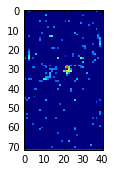

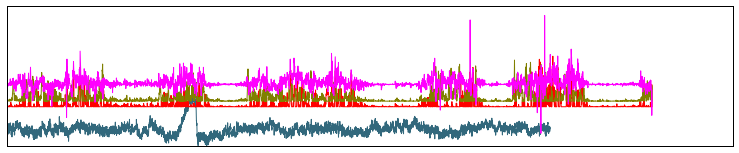

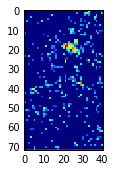

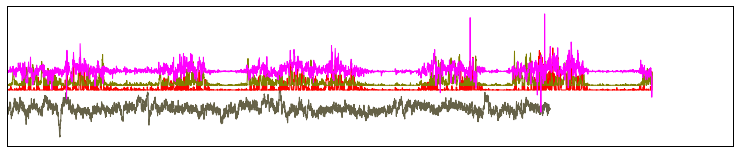

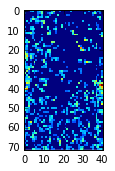

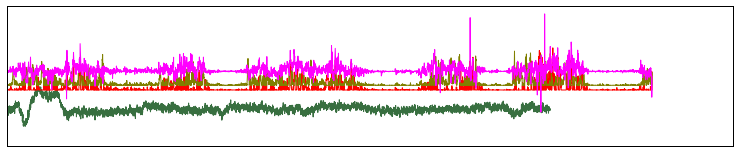

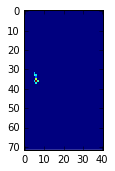

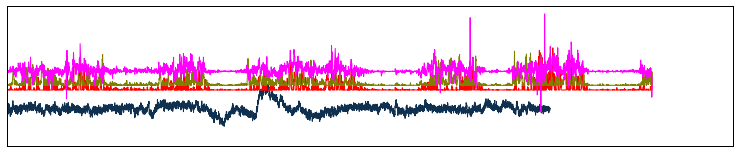

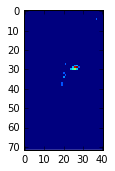

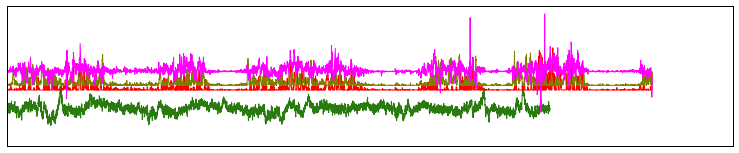

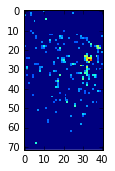

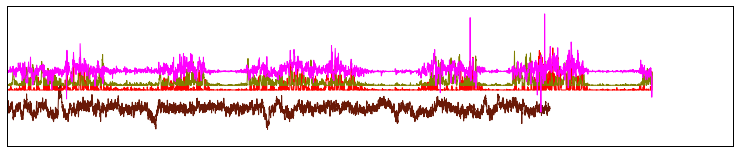

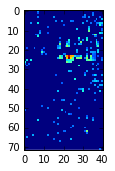

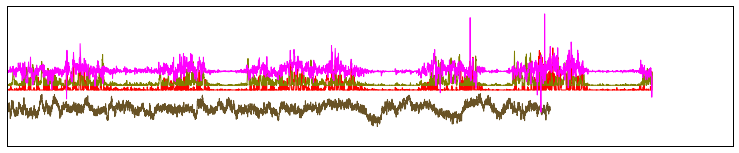

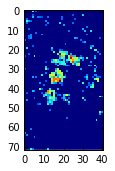

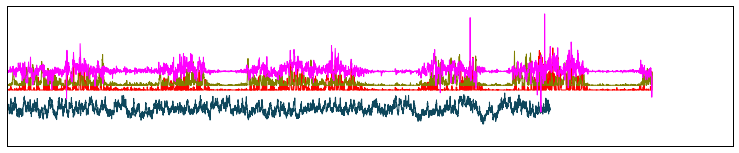

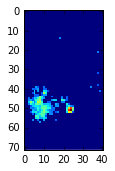

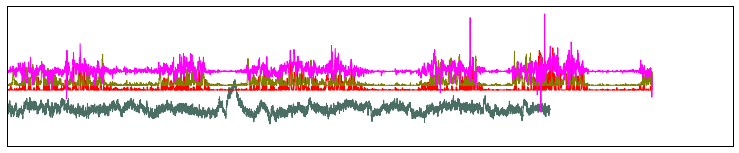

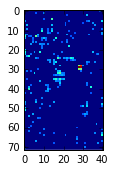

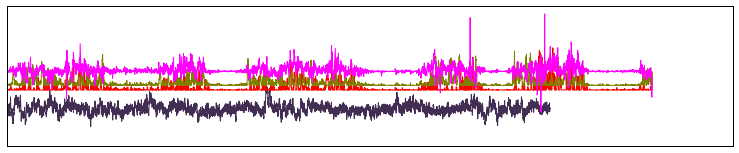

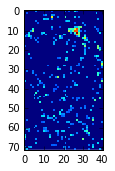

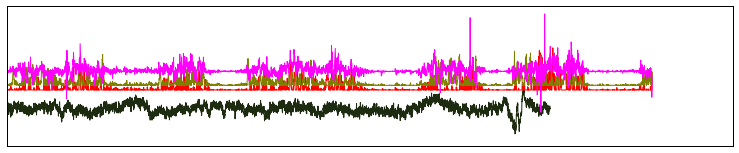

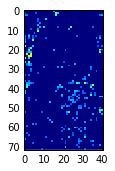

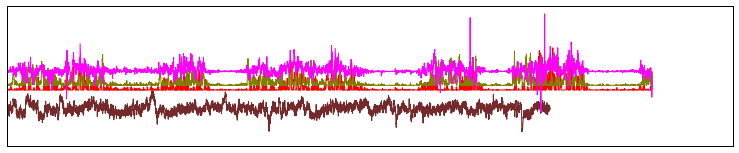

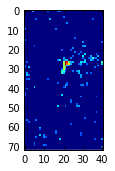

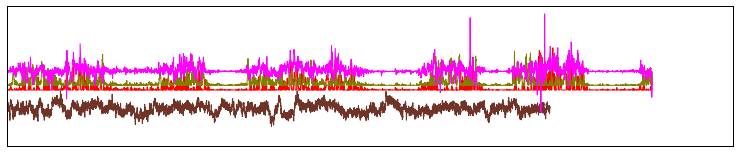

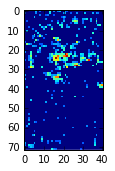

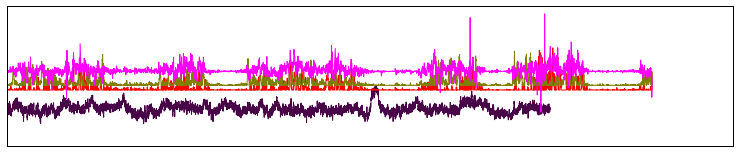

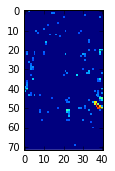

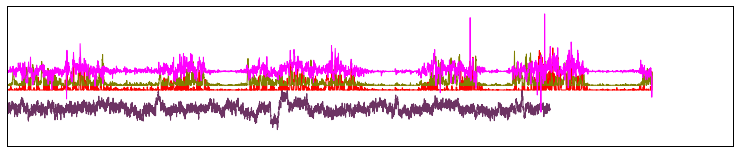

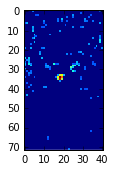

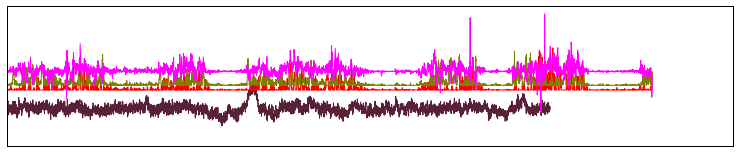

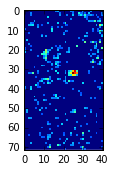

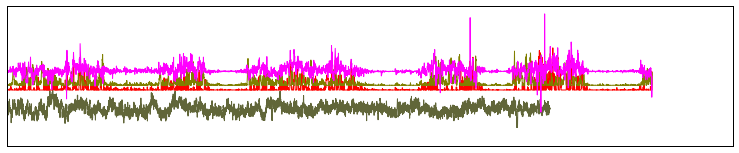

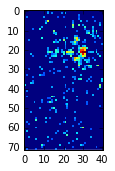

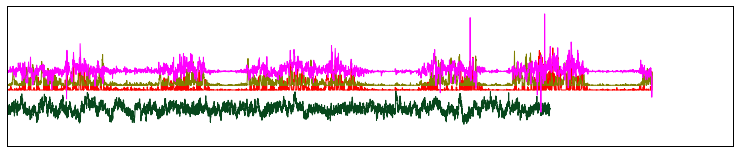

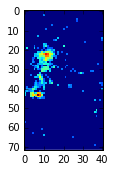

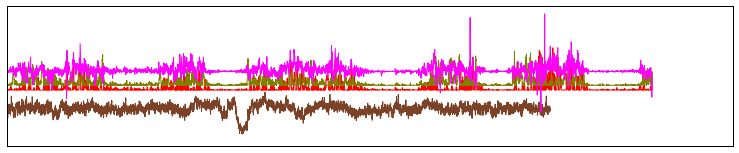

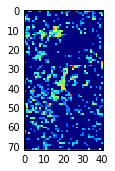

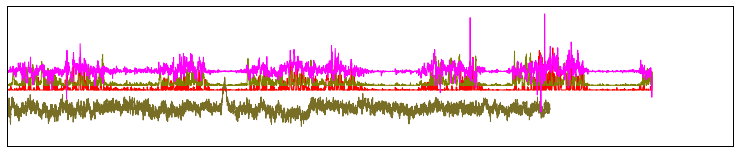

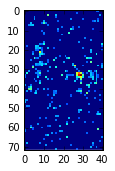

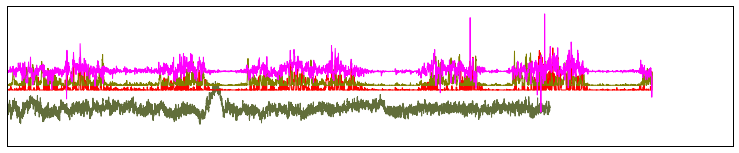

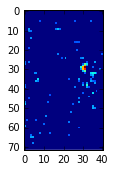

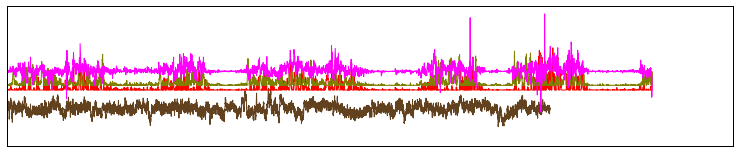

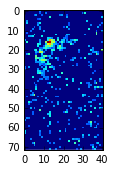

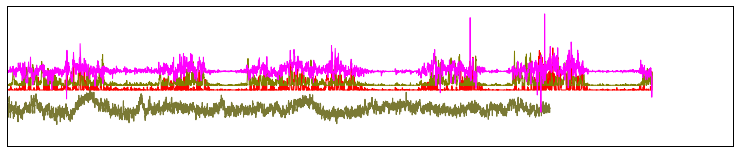

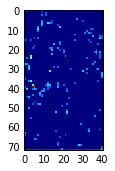

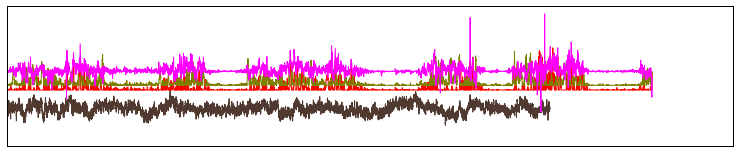

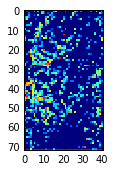

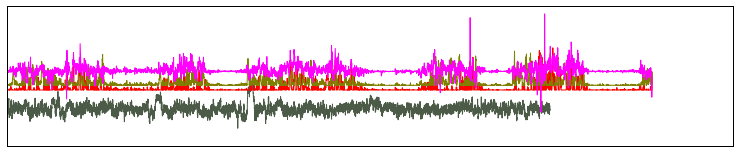

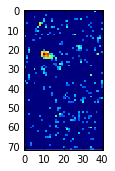

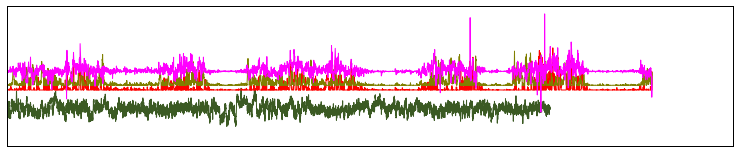

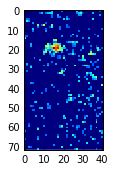

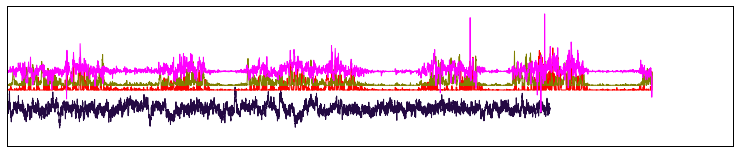

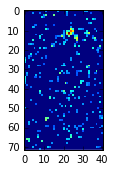

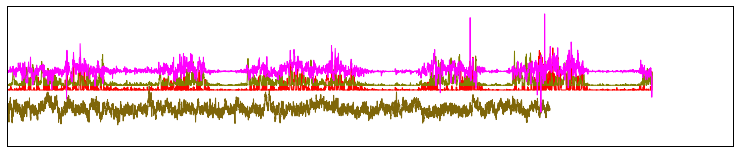

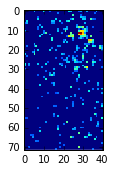

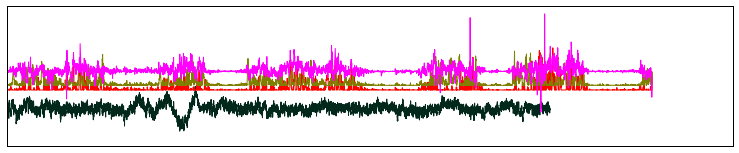

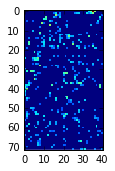

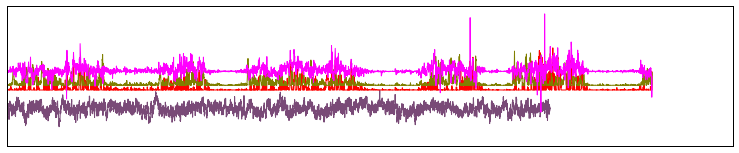

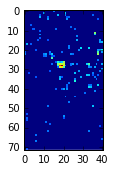

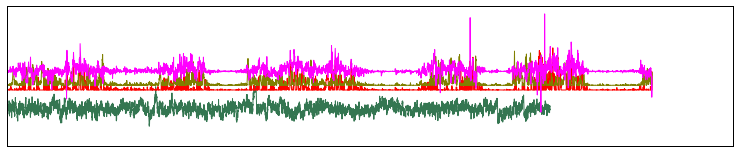

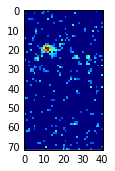

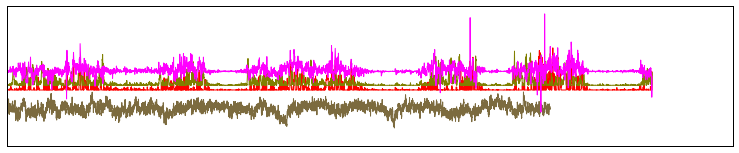

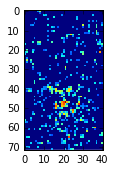

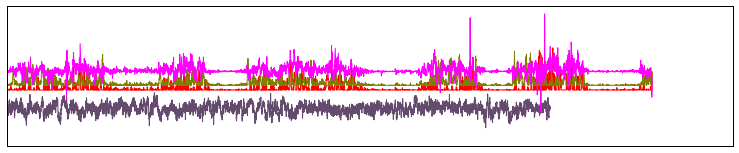

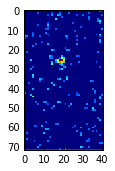

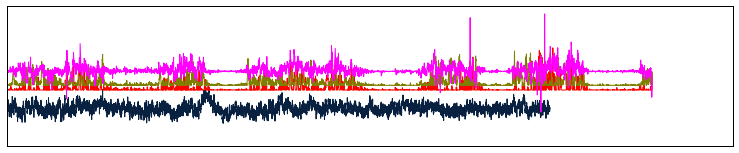

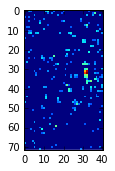

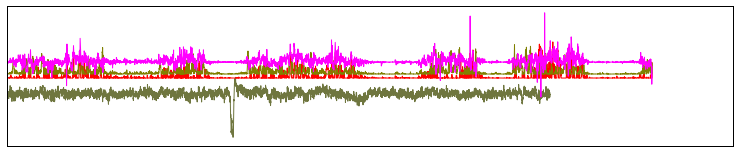

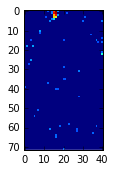

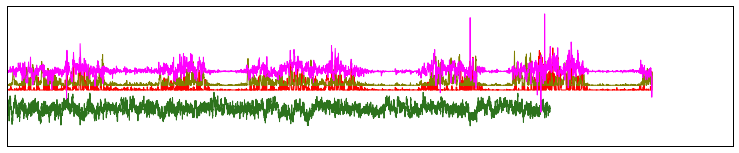

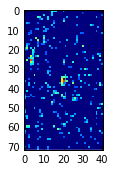

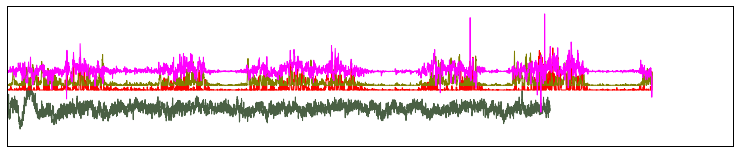

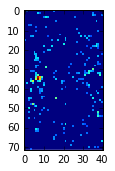

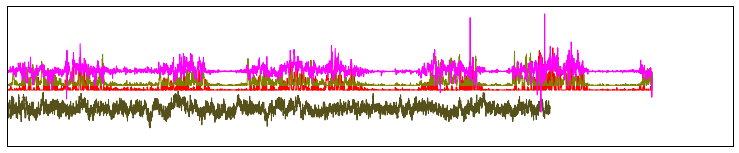

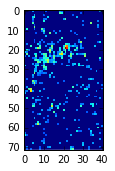

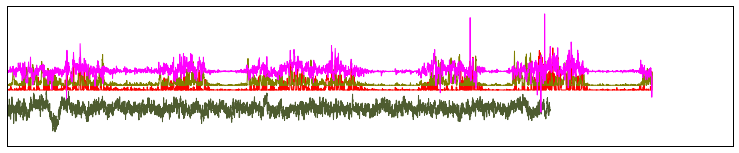

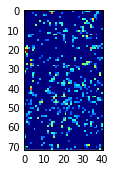

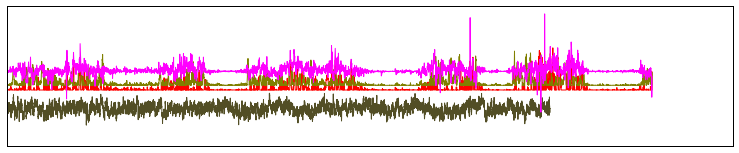

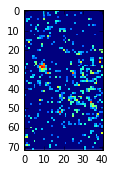

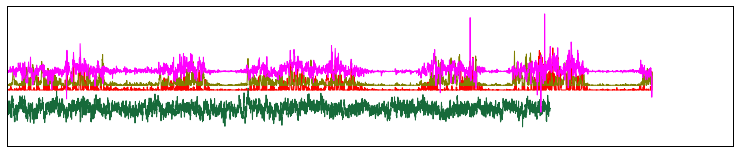

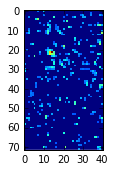

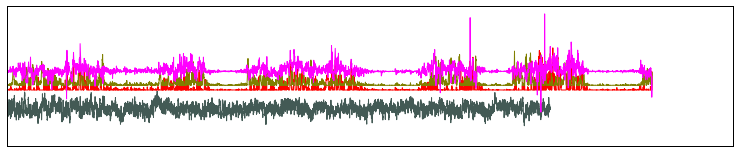

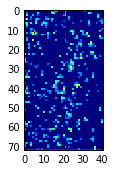

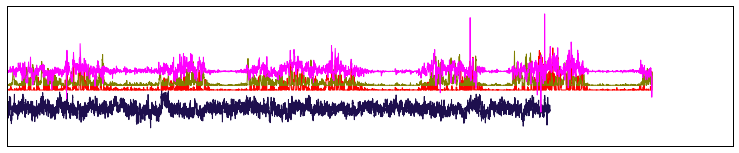

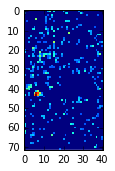

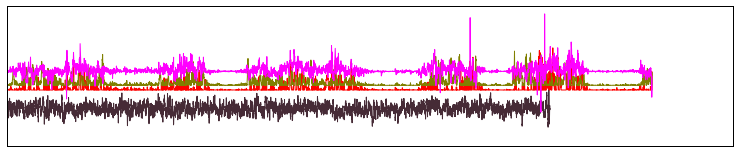

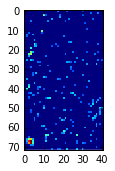

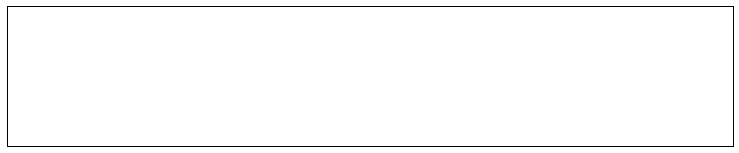

In [42]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for i in range(S[3]):                    
    Dmmv=np.mean(data[:,:,:,i],2) 
    Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
    C=np.squeeze(np.random.rand(3,1))
    labeled, nrobject=ndimage.label(Dmmv>0)
        
    if nrobject<200:                      
        Final_maps=Dmmv
        plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-2),color=C/2)        
        tot=tot+1

        plt.plot(TimeVid,Xk[:,0]/np.std(Xk[:,0])+2,color=(1,0,0))   
        plt.plot(TimeVid,Xk[:,1]/np.std(Xk[:,1])+3,color=(0.5,0.5,0))
        plt.plot(TimeVid,Xk[:,2]/np.std(Xk[:,2])+6,color=(1,0,1))
    #plt.plot(Time_fluoICA,Xk[:,6]/np.std(Xk[:,6])+12,color=(0,1,0))
    #plt.plot(Time_fluoICA,Xk[:,7]/np.std(Xk[:,7])+12,color=(0,0,1))
    #plt.plot(Time_fluoICA.T,2*Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,0,1))    

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)

LO_R
LOP_R
20
LO_R
LOP_R
39
LO_R
LOP_R
41
LO_R
LOP_R
ME_R
68
lobula


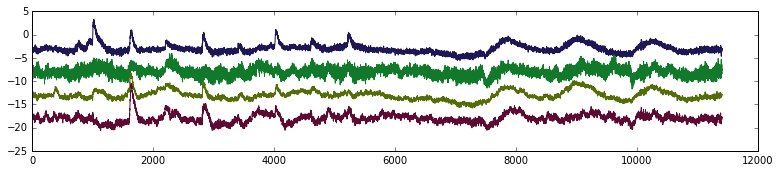

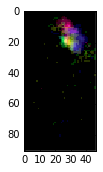

NO
58
NO
ATL_R
94
nodulus


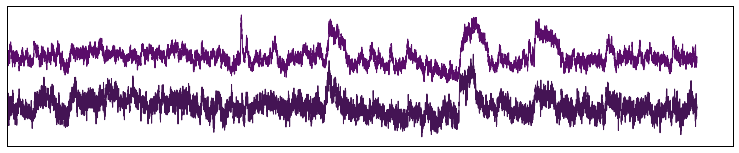

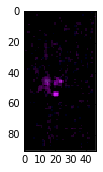

NO
PB
ATL_R
54
NO
PB
ATL_L
60
PB
80
PB
ATL_R
84
PB
ATL_R
FB
ATL_L
95
protocerebral bridge


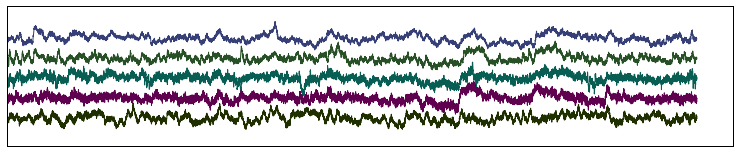

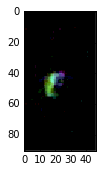

LH_R
7
LH_R
AL_R
9
LH_R
13
LH_R
MB_CA_R
21
LH_R
AL_R
MB_CA_R
25
LH_R
PVLP_R
PLP_R
104
lateral horn


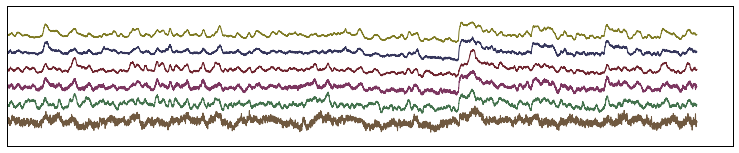

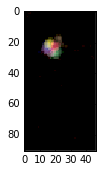

MB_PED_R
82
pedunculus of adult mushroom body


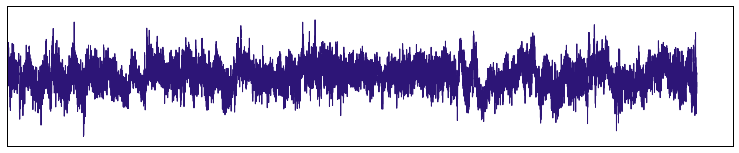

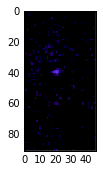

MB_VL_R
MB_ML_L
6
CRE_R
MB_VL_R
MB_ML_R
SIP_R
10
vertical lobe of adult mushroom body


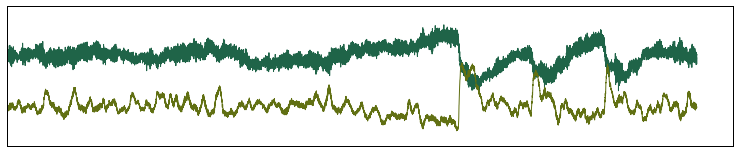

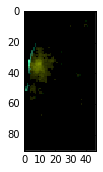

MB_ML_R
MB_CA_R
12
MB_VL_R
MB_ML_R
AVLP_L
IPS_L
31
MB_ML_R
MB_ML_L
89
CRE_R
MB_ML_R
SPS_R
92
medial lobe of adult mushroom body


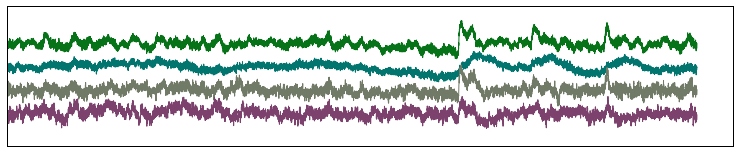

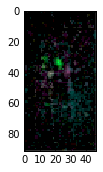

FLA_R
37
flange


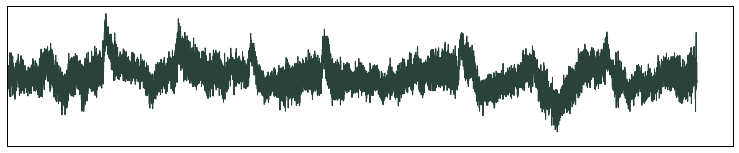

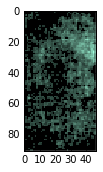

MB_VL_R
LOP_R
1
ICL_R
LOP_R
ME_R
SMP_L
23
LOP_R
40
LO_R
LOP_R
56
MB_VL_R
LOP_R
MB_CA_R
SIP_L
114
lobula plate


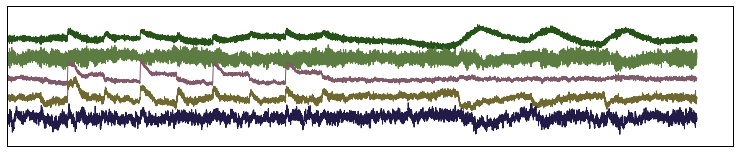

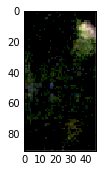

LAL_R
AL_R
29
adult antennal lobe


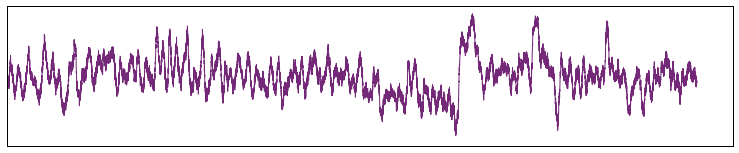

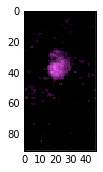

LO_R
LOP_R
ME_R
35
MB_VL_R
ME_R
SCL_R
ME_L
45
ME_R
MB_VL_L
48
LOP_R
ME_R
50
LO_R
ME_R
57
medulla


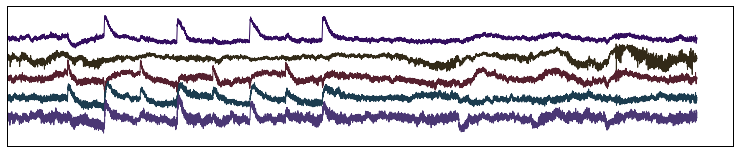

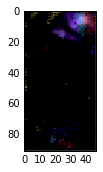

LOP_R
SIP_R
19
superior intermediate protocerebrum


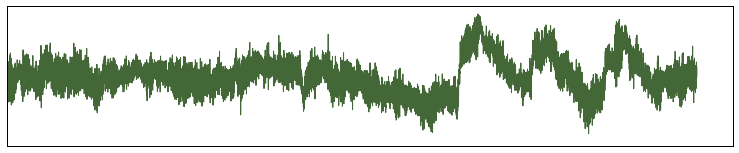

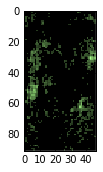

AVLP_R
PVLP_R
IVLP_R
66
anterior ventrolateral protocerebrum


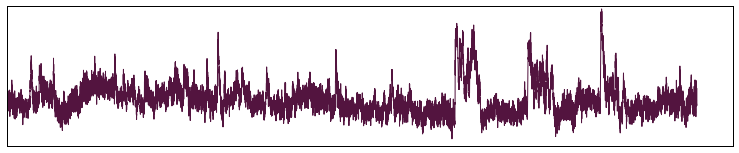

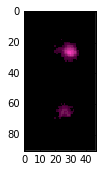

CRE_R
PLP_R
MB_PED_L
SPS_L
88
LAL_R
PLP_R
SPS_L
97
posterior lateral protocerebrum


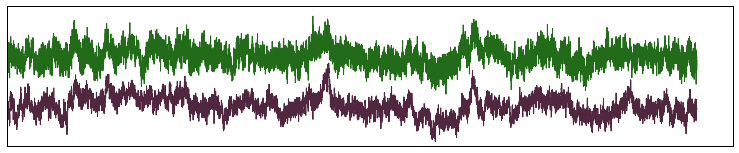

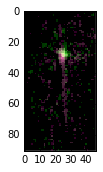

MB_CA_R
3
MB_CA_R
4
LH_R
MB_VL_R
MB_CA_R
8
MB_CA_R
11
MB_VL_R
MB_CA_R
14
MB_CA_R
18
MB_CA_R
IPS_L
28
ME_R
MB_CA_R
AL_L
44
MB_CA_R
46
MB_CA_R
63
LAL_R
MB_CA_R
EPA_R
MB_ML_L
76
MB_CA_R
109
CRE_R
AL_R
MB_CA_R
115
calyx of adult mushroom body


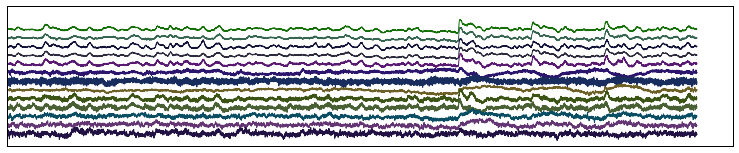

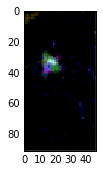

SPS_R
IPS_R
78
superior posterior slope


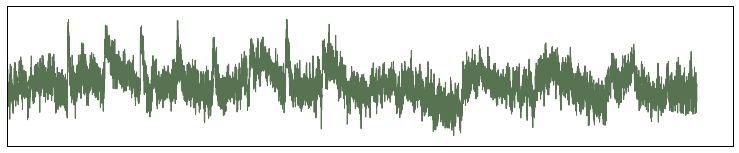

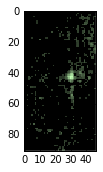

AMMC_R
MB_ML_R
FLA_R
GNG
52
GNG
75
adult gnathal ganglion


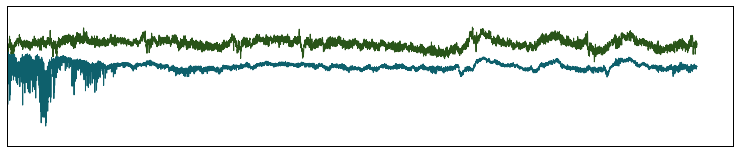

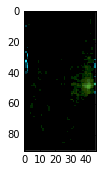

LO_L
LOP_L
77
lobula


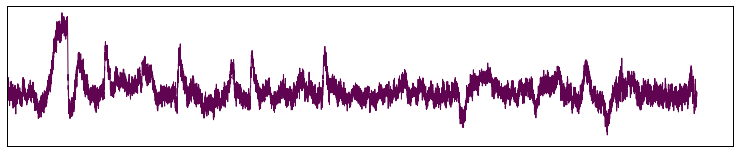

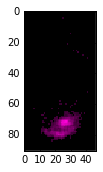

LH_L
MB_CA_L
22
LH_L
PLP_L
43
LH_L
AL_L
59
LH_L
72
lateral horn


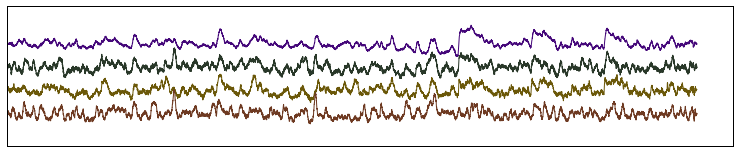

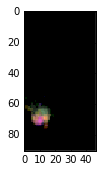

MB_VL_R
LOP_R
MB_VL_L
0
MB_VL_R
MB_VL_L
SIP_L
15
MB_VL_L
36
MB_PED_L
MB_VL_L
SIP_L
62
vertical lobe of adult mushroom body


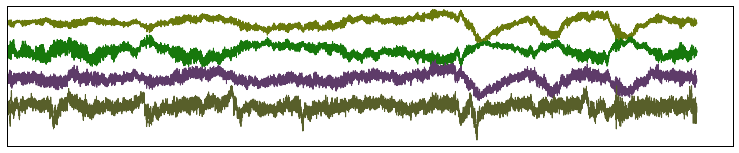

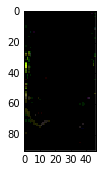

MB_ML_L
30
MB_VL_L
MB_ML_L
MB_CA_L
85
medial lobe of adult mushroom body


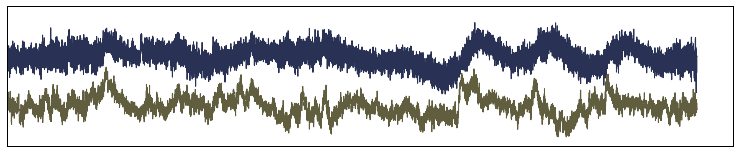

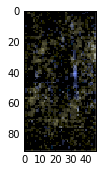

AL_R
LAL_L
AL_L
17
AL_L
34
AL_R
FLA_L
AL_L
47
AL_L
51
MB_CA_R
AL_L
99
adult antennal lobe


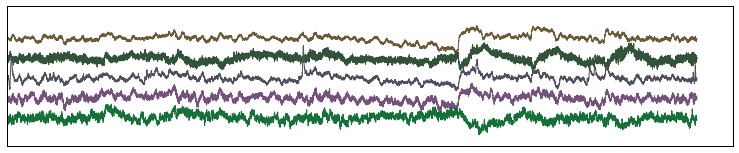

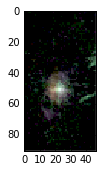

MB_CA_L
5
MB_CA_L
16
MB_CA_L
24
LH_L
MB_CA_L
26
MB_ML_L
MB_CA_L
27
PLP_L
MB_CA_L
38
MB_ML_L
MB_CA_L
49
MB_CA_L
71
MB_VL_R
MB_VL_L
MB_CA_L
106
FLA_R
MB_CA_R
PLP_L
MB_CA_L
116
calyx of adult mushroom body


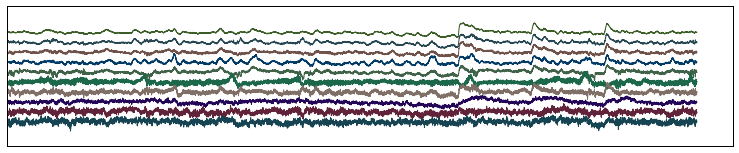

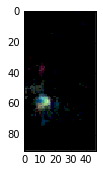

SPS_L
42
superior posterior slope


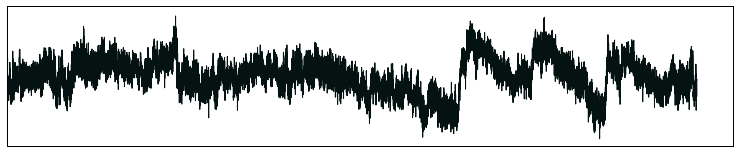

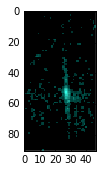

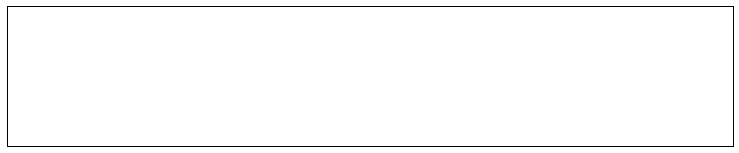

In [17]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [18]:
BadICs=[6,31,37,19,88,97,44,28,52,75,0,15,36,62,30,85,34,42]

In [19]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [20]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  4,  4,  4,  4,  4,
        4,  5,  8,  8, 12, 15, 15, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 22, 24, 24, 24, 24, 24, 25, 25, 25,
       25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 30, 33, 34, 34, 34, 34,
       34, 34, 34, 35, 35, 35, 35, 37, 37, 42, 45, 47, 47, 47, 47, 47, 47,
       48, 48, 48, 53, 53, 62, 62, 63, 66, 69, 69, 70, 70, 72, 72, 74, 74,
       75])

In [21]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [22]:
LargerRegionI

array([ 5,  1,  7,  5,  5,  5,  5,  6,  5,  6,  5,  5,  5,  6,  5,  5,  5,
        4,  5,  7,  1,  6,  6,  1,  5,  6,  5,  5,  5,  4,  5,  5,  5,  1,
        4,  1,  5, 11,  5,  1,  1,  1,  3,  6,  5,  1,  5,  4,  1,  5,  1,
        4, 12, 10,  8,  5,  1,  1,  8,  6,  8,  9,  5,  5, 13, 11,  2, 11,
        1,  5,  8,  5,  6,  3,  1, 12,  5,  1,  3, 11,  8,  2,  5,  4,  8,
        5, 11, 10,  2,  5,  6,  5,  5,  1,  8,  8,  8,  2,  9,  4, 11,  5,
       10,  5,  6,  1,  5,  4, 10,  5,  5, 11,  5,  5,  1,  5,  5,  2,  5,
        5])

In [23]:
GoodICAnat

array([ 0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.])

OL
1
20
23
35
39
40
41
45
48
50
56
57
68
77
114


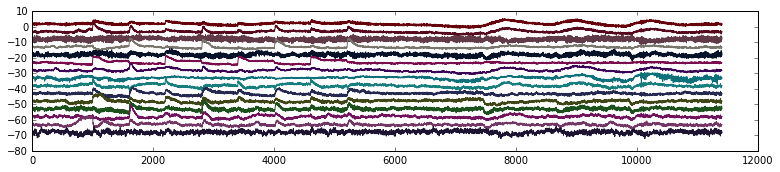

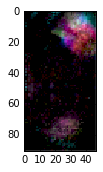

VLNP
66


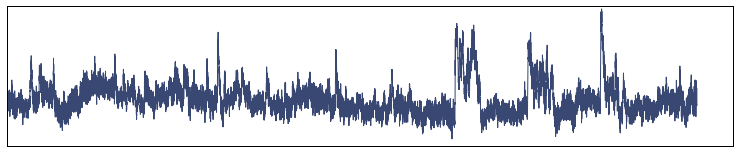

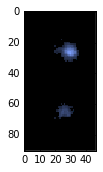

VMNP
78


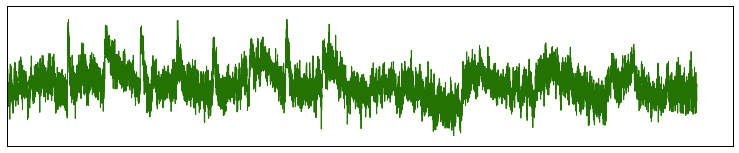

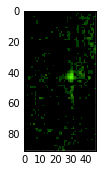

AL
17
29
47
51
99


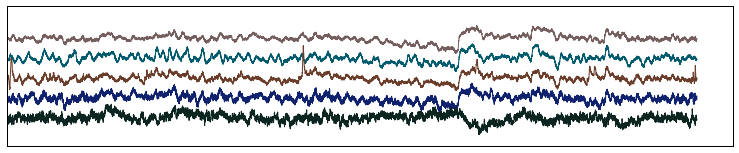

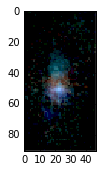

MB
3
4
5
8
10
11
12
14
16
18
24
26
27
38
46
49
63
71
76
82
89
92
106
109
115
116


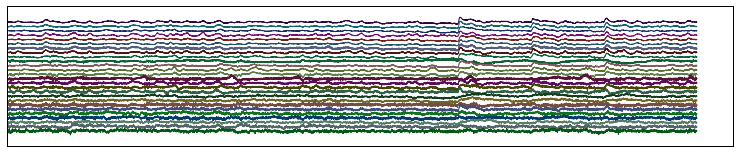

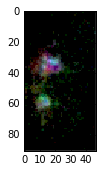

LH
7
9
13
21
22
25
43
59
72
104


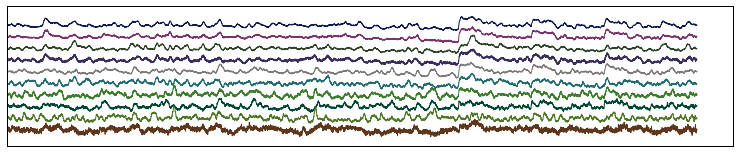

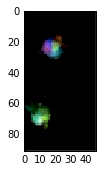

SNP
CX
54
58
60
80
84
94
95


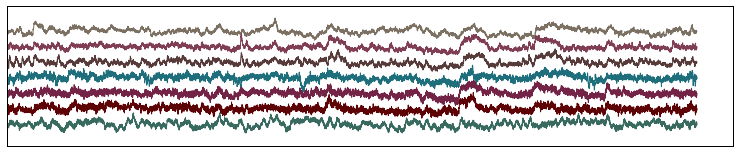

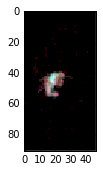

LX
INP
PENP
GNG


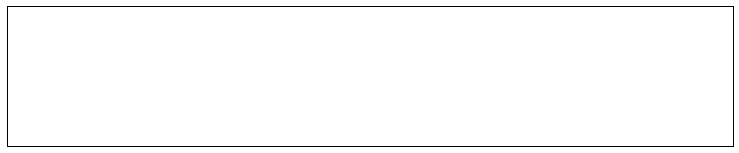

In [24]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [25]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)